# Steam games data analysis

#### Based on https://www.kaggle.com/datasets/nikatomashvili/steam-games-dataset

"I have gathered this dataset by scraping the rolling page of the steam search site: https://store.steampowered.com/search/?category1=998&ndl=1&ignore_preferences=1
The data has been scraped in early September.
The data is unorganized and needs cleaning."
- Author's readme note (nikatomashvili)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
#Loading the dataset from local drive
games = pd.read_csv(r'.\steam_games_data.csv')
games.head(5)

,Title,Original Price,Discounted Price,Release Date,Link,Game Description,Recent Reviews Summary,All Reviews Summary,Recent Reviews Number,All Reviews Number,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
0,Baldur's Gate 3,$29.99,$29.99,"3 Aug, 2023",https://store.steampowered.com/app/1086940/Bal...,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,Very Positive,"- 96% of the 128,900 user reviews in the last ...","- 94% of the 188,617 user reviews for this gam...",Larian Studios,Larian Studios,"['English', 'French', 'German', 'Spanish - Spa...","['RPG', 'Choices Matter', 'Character Customiza...","['Single-player', 'Online Co-op', 'LAN Co-op',...",Requires a 64-bit processor and operating syst...
1,Counter-Strike: Global Offensive,$14.99,$14.99,"21 Aug, 2012",https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,Very Positive,"- 89% of the 75,284 user reviews in the last 3...","- 88% of the 7,428,921 user reviews for this g...","Valve, Hidden Path Entertainment",Valve,"['English', 'Czech', 'Danish', 'Dutch', 'Finni...","['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['Steam Achievements', 'Full controller suppor...",OS: | Windows® 7/Vista/XP | Processor: | Int...
2,Apex Legends™,Free,Free,"4 Nov, 2020",https://store.steampowered.com/app/1172470/Ape...,"Apex Legends is the award-winning, free-to-pla...",Mixed,Very Positive,"- 65% of the 18,581 user reviews in the last 3...","- 80% of the 701,597 user reviews for this gam...",Respawn Entertainment,Electronic Arts,"['English', 'French', 'Italian', 'German', 'Sp...","['Free to Play', 'Multiplayer', 'Battle Royale...","['Online PvP', 'Online Co-op', 'Steam Achievem...",Requires a 64-bit processor and operating syst...
3,Forza Horizon 5,$34.78,$17.39,"8 Nov, 2021",https://store.steampowered.com/app/1551360/For...,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,Very Positive,"- 87% of the 4,120 user reviews in the last 30...","- 88% of the 123,162 user reviews for this gam...",Playground Games,Xbox Game Studios,"['English', 'French', 'Italian', 'German', 'Sp...","['Racing', 'Open World', 'Driving', 'Multiplay...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
4,Call of Duty®,Free,Free,"27 Oct, 2022",https://store.steampowered.com/app/1938090/Cal...,"Welcome to Call of Duty® HQ, the home of Call ...",Mixed,Mixed,"- 49% of the 8,257 user reviews in the last 30...","- 57% of the 236,876 user reviews for this gam...","Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"['English', 'French', 'Italian', 'German', 'Sp...","['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...


### Data cleaning & preparation

In [3]:
#Dropping irrelevant columns
games = games.drop(['Recent Reviews Number','All Reviews Number', 'Link'], axis = 1)

In [4]:
#Assesing the number of null values
games.isnull().sum()

Title                         1
Original Price                0
Discounted Price              0
Release Date                131
Game Description            211
Recent Reviews Summary    15220
All Reviews Summary       66329
Developer                   221
Publisher                   517
Supported Languages           0
Popular Tags                  0
Game Features                 0
Minimum Requirements       1124
dtype: int64

In [5]:
#Identyfing the row with missing Title - it contains mostly NaN values which suggests it's an error. 
games[games.Title.isnull()]

,Title,Original Price,Discounted Price,Release Date,Game Description,Recent Reviews Summary,All Reviews Summary,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
56954,NaN,Free,Free,NaN,NaN,NaN,NaN,NaN,NaN,[],[],[],NaN


In [6]:
#Games with Developer null appear to be reeditions of previously published games.
games[games.Developer.isnull()].head()

,Title,Original Price,Discounted Price,Release Date,Game Description,Recent Reviews Summary,All Reviews Summary,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
1317,The Witcher 3: Wild Hunt - Complete Edition,$24.99,$24.99,"30 Aug, 2016",NaN,NaN,NaN,NaN,THE WITCHER®,[],[],"['Single-player', 'Downloadable Content', 'Ste...",NaN
1448,The Elder Scrolls V: Skyrim Anniversary Edition,$30.99,$30.99,"10 Nov, 2021",NaN,NaN,NaN,NaN,NaN,[],['Violent'],[],NaN
1583,DARK SOULS III Deluxe Edition,$64.98,$64.98,"11 Apr, 2016",NaN,NaN,NaN,NaN,FRANCHISE,[],[],"['Single-player', 'Downloadable Content', 'Ste...",NaN
1665,Monster Hunter Rise + Sunbreak,$47.99,$47.99,"29 Jun, 2022",NaN,NaN,NaN,NaN,Monster Hunter,[],[],"['Single-player', 'Online Co-op', 'Downloadabl...",NaN
2057,Fallout 4: Game of the Year Edition,$29.99,$29.99,"10 Nov, 2015",NaN,NaN,NaN,NaN,NaN,[],[],[],NaN


In [7]:
#Games with Publisher null appear to be mostly reeditions of previously published games.
games[games.Publisher.isnull()].head()

,Title,Original Price,Discounted Price,Release Date,Game Description,Recent Reviews Summary,All Reviews Summary,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
166,DCS World Steam Edition,Free,Free,"2 Aug, 2013","Feel the excitement of flying the Su-25T ""Frog...",Very Positive,Very Positive,Eagle Dynamics SA,NaN,"['English', 'German', 'Spanish - Spain', 'Russ...","['Simulation', 'Flight', 'Free to Play', 'Mili...","['Single-player', 'Online PvP', 'LAN PvP', 'On...",OS: | Windows 10 | Processor: | Intel or AMD...
692,Cat Goes Fishing,$4.99,$4.99,"19 Jan, 2015",Start out on an island with a basic rod. Progr...,Very Positive,Very Positive,Cat5Games,NaN,['English'],"['Fishing', 'Cats', 'Casual', 'Cute', 'Relaxin...","['Single-player', 'Steam Achievements', 'Steam...",OS: | Windows XP | Processor: | 1.66GHz Inte...
1448,The Elder Scrolls V: Skyrim Anniversary Edition,$30.99,$30.99,"10 Nov, 2021",NaN,NaN,NaN,NaN,NaN,[],['Violent'],[],NaN
1918,Hero Zero - Multiplayer RPG,Free,Free,"5 Jul, 2016","Become a hero, build your own Hide-Out and sta...",Very Positive,Very Positive,Playata GmbH,NaN,"['English', 'French', 'Italian', 'German', 'Sp...","['Free to Play', 'RPG', 'Casual', 'Adventure',...","['Single-player', 'MMO', 'Online PvP', 'Cross-...",OS: | Windows XP | Processor: | Intel Pentiu...
2057,Fallout 4: Game of the Year Edition,$29.99,$29.99,"10 Nov, 2015",NaN,NaN,NaN,NaN,NaN,[],[],[],NaN


In [8]:
#As before - mostly reeditions
games[games['Release Date'].isnull()].head()

,Title,Original Price,Discounted Price,Release Date,Game Description,Recent Reviews Summary,All Reviews Summary,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
141,Grand Theft Auto IV: Complete Edition,Free,Free,NaN,PLEASE NOTE: Microsoft no longer supports crea...,Very Positive,Very Positive,"Rockstar North, Rockstar Toronto",Rockstar Games,"['English', 'French', 'German', 'Italian', 'Sp...","['Open World', 'Action', 'Automobile Sim', 'Mu...","['Single-player', 'Partial Controller Support']",NaN
1789,Stronghold 2: Steam Edition,$8.49,$8.49,NaN,"Tax, torture or treat your peasants! Rehabilit...",Very Positive,Very Positive,FireFly Studios,FireFly Studios,"['English', 'French', 'Italian', 'German', 'Sp...","['City Builder', 'Real Time Tactics', 'Colony ...","['Single-player', 'Online PvP', 'Steam Achieve...",OS: | Windows XP/Vista/7/8/10/11 | Processor:...
2290,RAGE,$9.99,$9.99,NaN,Powered by id’s revolutionary id Tech® 5 techn...,Mostly Positive,Mostly Positive,id Software,Bethesda Softworks,"['English', 'Czech', 'French', 'German', 'Ital...","['FPS', 'Post-apocalyptic', 'Action', 'Open Wo...","['Single-player', 'Steam Achievements', 'Parti...","OS: | Win XP SP3, Vista, Win 7 | | Processo..."
2937,Total War: Empire - Definitive Edition,$16.99,$16.99,NaN,NaN,NaN,NaN,NaN,Total War,[],[],"['Single-player', 'Online PvP', 'LAN PvP', 'On...",NaN
3165,Aliens: Colonial Marines Collection,$16.99,$16.99,NaN,You & your friends are the deadliest killers i...,Mostly Positive,Mixed,Gearbox Software,SEGA,"['English', 'French', 'German', 'Italian', 'Po...","['Action', 'FPS', 'Aliens', 'Co-op', 'Sci-fi',...","['Single-player', 'Steam Achievements', 'Full ...",OS: | Operating System: Windows XP SP3 | | ...


In [9]:
#Dropping rows with NA in 'Release Date' column
games.dropna(subset = ['Release Date'], inplace = True)

In [10]:
#Game Description, Reviews Summaries and Minimum Requirents can stay NA
games.isna().sum()

Title                         0
Original Price                0
Discounted Price              0
Release Date                  0
Game Description            162
Recent Reviews Summary    15121
All Reviews Summary       66206
Developer                   175
Publisher                   481
Supported Languages           0
Popular Tags                  0
Game Features                 0
Minimum Requirements       1060
dtype: int64

In [11]:
#Checking datatypes - as all datatypes have been classified as objects, conversions are required
games.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Index: 71569 entries, 0 to 71699
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   71569 non-null  object
 1   Original Price          71569 non-null  object
 2   Discounted Price        71569 non-null  object
 3   Release Date            71569 non-null  object
 4   Game Description        71407 non-null  object
 5   Recent Reviews Summary  56448 non-null  object
 6   All Reviews Summary     5363 non-null   object
 7   Developer               71394 non-null  object
 8   Publisher               71088 non-null  object
 9   Supported Languages     71569 non-null  object
 10  Popular Tags            71569 non-null  object
 11  Game Features           71569 non-null  object
 12  Minimum Requirements    70509 non-null  object
dtypes: object(13)
memory usage: 106.2 MB


In [12]:
#Assesing potential categorical variables - Recent Reviews Summary and All Reviews Summary are good candidates
games.nunique()

Title                     71569
Original Price              653
Discounted Price            826
Release Date               4441
Game Description          71010
Recent Reviews Summary       18
All Reviews Summary           7
Developer                 45319
Publisher                 38503
Supported Languages       11051
Popular Tags              65749
Game Features              5398
Minimum Requirements      63142
dtype: int64

In [13]:
#Converting reviews to category dtype
games[['Recent Reviews Summary','All Reviews Summary']] = games[['Recent Reviews Summary','All Reviews Summary']]\
.astype('category')

In [14]:
#Assesing the format of a datetime candidate
#Categorical values are frequent - they need to be separated from valid datetime entries
games['Release Date'].value_counts()

Release Date
Coming soon        5887
To be announced    1809
2023                787
Q4 2023             392
2024                388
                   ... 
26 Aug, 2010          1
2 Aug, 2013           1
20 May, 2011          1
2 Mar, 2012           1
5 Mar, 2024           1
Name: count, Length: 4441, dtype: int64

In [15]:
#Converting to pd.datetime with coerce - disqualifying non-standard date formats from time series analysis
games['Release Date'] = pd.to_datetime(games['Release Date'], errors = 'coerce', format='%d %b, %Y')

In [16]:
#Checking games with unrealistic Release Dates
games_release_after_2030 = games['Release Date'].dt.year > 2030
games = games[~games_release_after_2030]

In [17]:
#Converting prices to floating point values
def convert_price_column(price_series):
    # Remove dollar signs and commas, replace 'Free' with 0, convert to float
    return pd.to_numeric(price_series.replace('[\$,]', '', regex=True).replace('Free', '0'), errors='coerce')

# Apply the conversion function to each price column
games['Original Price'] = convert_price_column(games['Original Price'])
games['Discounted Price'] = convert_price_column(games['Discounted Price'])
games.head()

,Title,Original Price,Discounted Price,Release Date,Game Description,Recent Reviews Summary,All Reviews Summary,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
0,Baldur's Gate 3,29.99,29.99,2023-08-03,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,Very Positive,Larian Studios,Larian Studios,"['English', 'French', 'German', 'Spanish - Spa...","['RPG', 'Choices Matter', 'Character Customiza...","['Single-player', 'Online Co-op', 'LAN Co-op',...",Requires a 64-bit processor and operating syst...
1,Counter-Strike: Global Offensive,14.99,14.99,2012-08-21,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,Very Positive,"Valve, Hidden Path Entertainment",Valve,"['English', 'Czech', 'Danish', 'Dutch', 'Finni...","['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['Steam Achievements', 'Full controller suppor...",OS: | Windows® 7/Vista/XP | Processor: | Int...
2,Apex Legends™,0.00,0.00,2020-11-04,"Apex Legends is the award-winning, free-to-pla...",Mixed,Very Positive,Respawn Entertainment,Electronic Arts,"['English', 'French', 'Italian', 'German', 'Sp...","['Free to Play', 'Multiplayer', 'Battle Royale...","['Online PvP', 'Online Co-op', 'Steam Achievem...",Requires a 64-bit processor and operating syst...
3,Forza Horizon 5,34.78,17.39,2021-11-08,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,Very Positive,Playground Games,Xbox Game Studios,"['English', 'French', 'Italian', 'German', 'Sp...","['Racing', 'Open World', 'Driving', 'Multiplay...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
4,Call of Duty®,0.00,0.00,2022-10-27,"Welcome to Call of Duty® HQ, the home of Call ...",Mixed,Mixed,"Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"['English', 'French', 'Italian', 'German', 'Sp...","['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...


In [18]:
#Dropping rows with unrealistic prices
games_with_large_prices = (games['Original Price'] >= 200) | (games['Discounted Price'] >= 200) | (games['Original Price']
                            < 0) | (games['Discounted Price'] < 0)
games = games[~games_with_large_prices]

In [19]:
#Final state of dtypes
games.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Index: 71478 entries, 0 to 71699
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Title                   71478 non-null  object        
 1   Original Price          71478 non-null  float64       
 2   Discounted Price        71478 non-null  float64       
 3   Release Date            61301 non-null  datetime64[ns]
 4   Game Description        71316 non-null  object        
 5   Recent Reviews Summary  56367 non-null  category      
 6   All Reviews Summary     5363 non-null   category      
 7   Developer               71303 non-null  object        
 8   Publisher               70997 non-null  object        
 9   Supported Languages     71478 non-null  object        
 10  Popular Tags            71478 non-null  object        
 11  Game Features           71478 non-null  object        
 12  Minimum Requirements    70418 non-null  object     

### Summary statistics

In [20]:
#Setting pandas float_format for better readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [21]:
#Descriptive statisics might be affected strongly by free games
games.describe(percentiles = [.05, .25, .50, .75, .95], include = 'float')

,Original Price,Discounted Price
count,71478.00,71478.00
mean,4.45,4.18
std,7.17,5.76
min,0.00,0.00
5%,0.00,0.00
25%,0.79,0.41
50%,2.79,2.69
75%,6.29,6.29
95%,12.59,12.49
max,199.99,199.99


### Distribution of games releases over time

In [22]:
%matplotlib inline

In [23]:
#Analysing releases of games present on Steam by year
games['Release Year'] = games['Release Date'].dt.year.astype('Int64')
titles_per_year = games['Release Year'].value_counts().reset_index()
titles_per_year.columns = ['Release Year', 'Number of Titles']

In [24]:
#Setting the style and color palette
sns.set_style("whitegrid")

<Axes: title={'center': 'Games Releases over Time on Steam'}, xlabel='Release Year', ylabel='Number of Titles'>

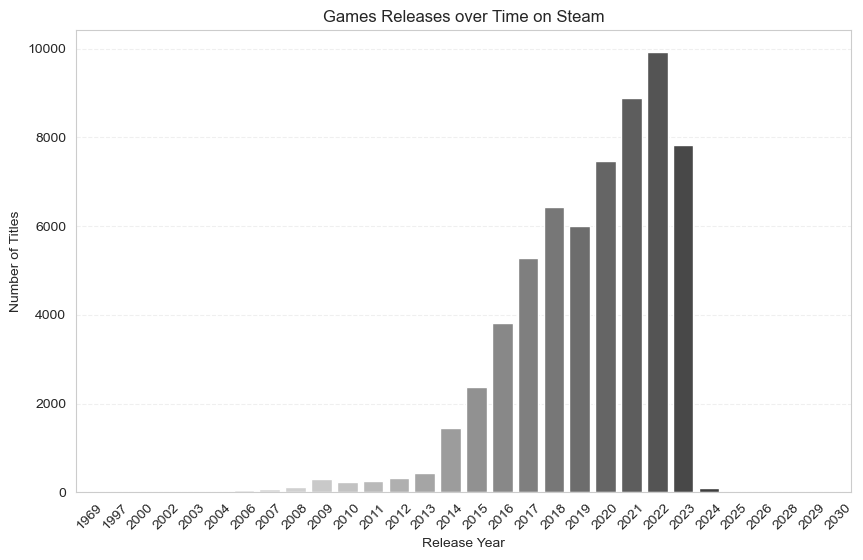

In [25]:
plt.figure(figsize = (10,6))
plt.xticks(rotation = 45)
plt.title('Games Releases over Time on Steam')
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.barplot(data = titles_per_year, x = 'Release Year', y = 'Number of Titles', palette = 'Greys')

A growing number of Steam game releases is observable, with 2022 bringing almost 10 000 releases.

### Mass-producing developers and publishers

In [26]:
#A little pre-processing - group, aggregate, sort, rename and reset index to convert to a DataFrame for more pleasing looks
developers = games[['Developer', 'Title']].groupby('Developer').agg('count').sort_values('Title', ascending = False)
publishers = games[['Publisher', 'Title']].groupby('Publisher').agg('count').sort_values('Title', ascending = False)
developers = developers.rename({'Title':'Number of titles developed'}).reset_index()
publishers = publishers.rename({'Title':'Number of titles published'}).reset_index()

In [27]:
developers.head(50)

,Developer,Title
0,Choice of Games,162
1,Creobit,136
2,Laush Dmitriy Sergeevich,119
3,Boogygames Studios,106
4,Sokpop Collective,101
5,Hosted Games,100
6,Reforged Group,95
7,Elephant Games,77
8,Dnovel,71
9,Somer Games,70


In [28]:
publishers.head(50)

,Publisher,Title
0,Big Fish Games,459
1,8floor,258
2,Conglomerate 5,199
3,HH-Games,174
4,Choice of Games,162
5,Strategy First,146
6,Sekai Project,143
7,SEGA,141
8,THQ Nordic,141
9,Laush Studio,135


# Analysing game pricing

In [29]:
#Basic preprocessing
games_pricing = games[['Title','Original Price','Discounted Price']].set_index('Title')
games_pricing_not_free = games_pricing[games_pricing['Original Price'] != 0]

In [30]:
#Descriptive stats
games_pricing.describe(percentiles = [.05, .25, .50, .75, .95]),\
games_pricing_not_free.describe(percentiles = [.05, .25, .50, .75, .95])

(       Original Price  Discounted Price
 count        71478.00          71478.00
 mean             4.45              4.18
 std              7.17              5.76
 min              0.00              0.00
 5%               0.00              0.00
 25%              0.79              0.41
 50%              2.79              2.69
 75%              6.29              6.29
 95%             12.59             12.49
 max            199.99            199.99,
        Original Price  Discounted Price
 count        53972.00          53972.00
 mean             5.90              5.53
 std              7.72              6.03
 min              0.72              0.18
 5%               0.90              0.90
 25%              2.19              2.19
 50%              3.99              3.99
 75%              6.99              6.99
 95%             14.49             14.49
 max            199.99            199.99)

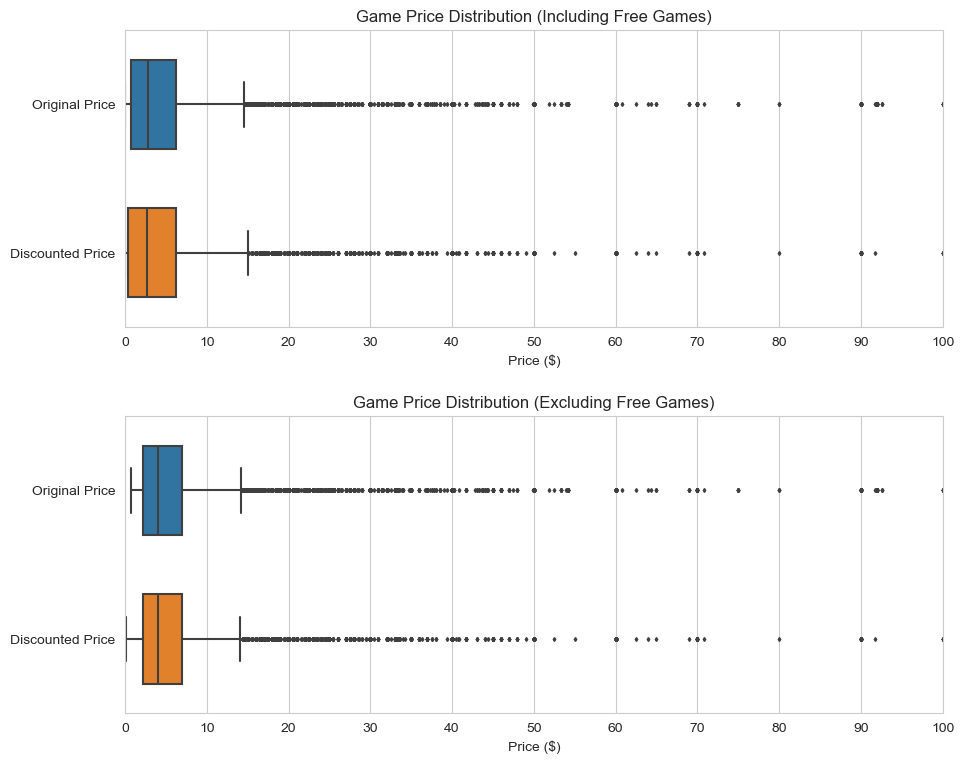

In [32]:
#Creating the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#Boxplotting prices - range limited to 100 for readability
#First Boxplot: Including free games
ax1.set(xlim=(0, 100), title='Game Price Distribution (Including Free Games)', xlabel='Price ($)')
ax1.xaxis.set_major_locator(mticker.MultipleLocator(10))
ax1.xaxis.set_minor_locator(mticker.MultipleLocator(2))
sns.boxplot(data=games_pricing, ax=ax1, orient='h', fliersize=2, width=0.6)

#Second Boxplot: Not including free games
ax2.set(xlim=(0, 100), title='Game Price Distribution (Excluding Free Games)', xlabel='Price ($)')
ax2.xaxis.set_major_locator(mticker.MultipleLocator(10))
ax2.xaxis.set_minor_locator(mticker.MultipleLocator(2))
sns.boxplot(data=games_pricing_not_free, ax=ax2, orient='h', fliersize=2, width=0.6)

#Adjusting layout for readability
plt.tight_layout(pad=2)

plt.show()

<Axes: title={'center': 'Game price distribution NOT including free games'}, xlabel='Price ($)', ylabel='Density'>

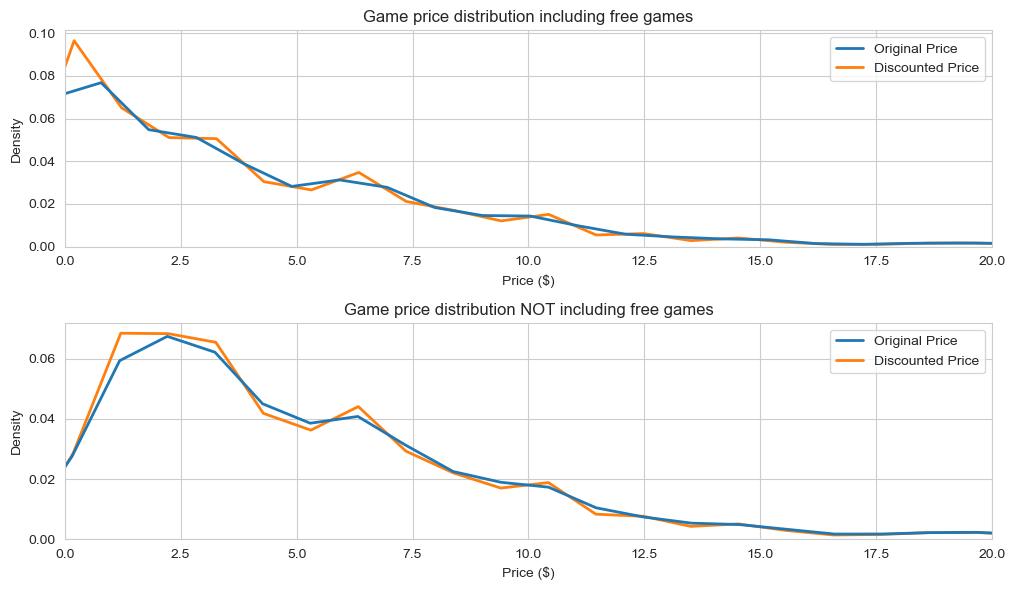

In [33]:
#KDEplotting prices - range limited to $20 for readability
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 6))
ax1.set(xlim=(0, 20), title = 'Game price distribution including free games', xlabel = 'Price ($)')
ax2.set(xlim=(0, 20), title = 'Game price distribution NOT including free games', xlabel = 'Price ($)')
plt.tight_layout()
sns.kdeplot(data = games_pricing, ax = ax1, linewidth = 2)
sns.kdeplot(data = games_pricing_not_free, ax = ax2, linewidth = 2)

Most games are priced within a similar range, whether considering the original or discounted prices.
Discounted prices are generally lower than original prices, as expected.
There are some games on Steam that have exceptionally high original or discounted prices compared to the majority, which might be collectors editions, bundles, or highly sought-after A++-class titles.

# Text analysis - games description and tags

In [34]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Most popular tags

In [35]:
#Literally evaluate Popular Tags
from ast import literal_eval
games['Popular Tags'] = games['Popular Tags'].apply(literal_eval)

In [36]:
#Flatten Popular Tags
all_tags = [tag for tags_list in games['Popular Tags'] for tag in tags_list]

#Convert to Data Series to use with pandas methods
all_tags = pd.Series(all_tags).value_counts()

#Filter to top 15 tags wtih most occurences
top_15_tags = all_tags.head(15)

#Convert to DF
top_15_tags_df = top_15_tags.reset_index()
top_15_tags_df.columns = ['Tag','Count']

<Axes: title={'center': 'Most popular Steam tags'}, xlabel='Tag', ylabel='Count'>

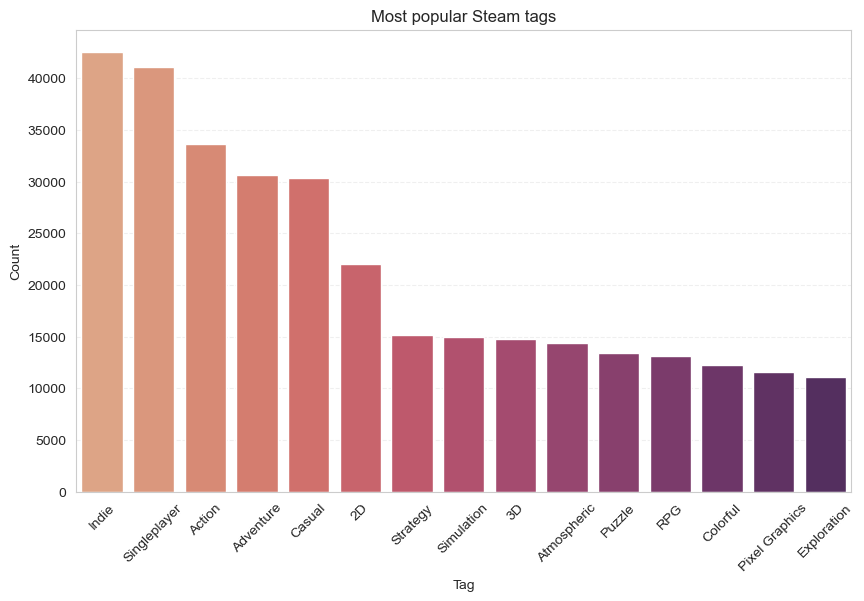

In [37]:
#Plotting Tags - Indie appears to be the most popular Tag in Steam!
plt.figure(figsize = (10,6))
plt.xticks(rotation = 45)
plt.xlabel("Tag", )
plt.title('Most popular Steam tags')
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.barplot(data = top_15_tags_df, x = 'Tag', y = 'Count', palette = 'flare')

The "Indie" tag being the most popular would suggest that Steam is a major platform for independent developers. Many games on Steam are developed by small studios or even individual developers.

While there are clear winners in terms of tag popularity, the chart pictures the diversity of Steam Games.

### Preprocessing

In [38]:
#Attributing stopwords from nltk module to stop_words variable
stop_words = set(stopwords.words('english'))

In [39]:
def preprocess_text(text):
    if not pd.isnull(text):
        #Convert text to lowercase
        text = text.lower()
        #Remove special characters and numbers
        text = re.sub(r'[^a-z\s]', '', text)
        #Tokenize text
        tokens = word_tokenize(text)
        #Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    else:
        return text

In [40]:
#Applying tokenizing function
games['game_description_tokenized'] = games['Game Description'].apply(preprocess_text)

### Most common words

In [41]:
#List comprehension to extract a single list of words from description
words_list = [word for description in games['game_description_tokenized'].dropna() for word in description.split()]
#Convert to data series to use with pd functions
words_series = pd.Series(words_list)
#Display 15 most frequently appearing words
words_series.value_counts().head(15)

game          32991
world         12669
play           7001
adventure      6996
new            6731
way            5562
find           5440
action         5246
explore        5102
fight          4854
puzzle         4643
time           4642
take           4539
experience     4538
get            4514
Name: count, dtype: int64

In [42]:
from wordcloud import WordCloud

In [43]:
#Join all game descriptions into a single string
text_data = " ".join(description for description in games['Game Description'].dropna())

In [44]:
#Define and assign WordCloud to a variable
wordcloud = WordCloud(margin = 12, background_color='white', width=1600, height=800).generate(text_data)

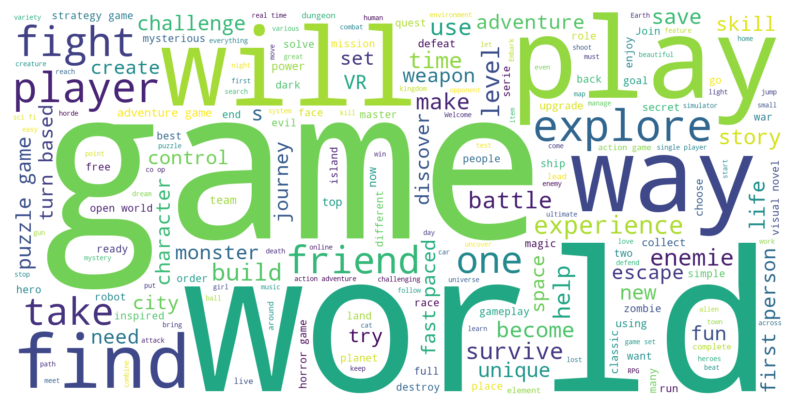

In [45]:
#show figure
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')  # Remove axes
plt.show()

### Sentiment Analysis

In [46]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [47]:
#Define a function to calculate sentiment
def calculate_sentiment(text):
    if pd.isnull(text):
        return None
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)
    return sentiment_score['compound']

In [ ]:
#Calculate Sentiment - warning, this function takes some time to execute(around 5 minutes on a low-end PC)
games['Sentiment'] = games['Game Description'].apply(calculate_sentiment)

In [ ]:
#Show basic statistics of sentiment scores
#sentiment score ranges from -1 to 1, from very negative to very positive respectively, while 0 being neutral
sentiment_stats = games['Sentiment'].describe()

#Plot the distribution of sentiment scores
plt.figure(figsize=(10, 5))
sns.histplot(games['Sentiment'].dropna(), bins=21, kde=True)
plt.title('Distribution of Sentiment Scores', fontsize = 16)
plt.xlabel('Sentiment Score')
plt.xlabel('Sentiment Score', fontsize=14)
plt.xlim((-1,1))
plt.ylabel('Frequency', fontsize = 14)
plt.show()

sentiment_stats

A large number of game descriptions have sentiment scores close to 0.00. 
This suggests that many game descriptions on Steam are being classified as completely neutral.

The distribution is more spread out on the negative side (-1.00 to 0.00) compared to the positive side. 
This means that while there are negative game descriptions, they vary more in their degree of negativity.

It appears that positive sentiment in game descriptions is significantly more common than negative sentiment.

In [ ]:
#Top 15 most positive game descriptions!
games_sentiment = games[['Title','Sentiment','Game Description']].\
sort_values('Sentiment', ascending = False).reset_index(drop = True).dropna()
games_sentiment.head(15)

In [ ]:
#15 least positive game descriptions!
games_sentiment.tail(15)